In [33]:
from ipynb.fs.full.extracao import fetch_pokedex, damage_matrix, Types
import pandas as pd
from enum import Enum
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import seaborn as sn
import matplotlib.pyplot as plt
from imageio.v2 import imread
from sklearn import svm
from sklearn.model_selection import GridSearchCV

In [34]:
class BattleRole(Enum):
    Attacker = "Attacker"
    SPAttacker = "SPAttacker"
    Tank = "Tank"
    SPTank = "SPTank"
    Sweeper = "Sweeper"  ## Rapida velocidade e ataque

In [35]:
status_columns = ["base_hp", "base_attack", "base_defense", "base_special_attack", "base_special_defense", "base_speed"]
pokedex_df = fetch_pokedex()

Baixando informações do pokemon 1
Baixando informações do pokemon 2
Baixando informações do pokemon 3
Baixando informações do pokemon 4
Baixando informações do pokemon 5
Baixando informações do pokemon 6
Baixando informações do pokemon 7
Baixando informações do pokemon 8
Baixando informações do pokemon 9
Baixando informações do pokemon 10
Baixando informações do pokemon 11
Baixando informações do pokemon 12
Baixando informações do pokemon 13
Baixando informações do pokemon 14
Baixando informações do pokemon 15
Baixando informações do pokemon 16
Baixando informações do pokemon 17
Baixando informações do pokemon 18
Baixando informações do pokemon 19
Baixando informações do pokemon 20
Baixando informações do pokemon 21
Baixando informações do pokemon 22
Baixando informações do pokemon 23
Baixando informações do pokemon 24
Baixando informações do pokemon 25
Baixando informações do pokemon 26
Baixando informações do pokemon 27
Baixando informações do pokemon 28
Baixando informações do pokem

In [36]:
pokedex_df.head()

,color,is_legendary,is_mythical,name,shape,image_url,base_hp,base_attack,base_defense,base_special_attack,base_special_defense,base_speed
0,green,False,False,bulbasaur,quadruped,https://raw.githubusercontent.com/PokeAPI/spri...,45,49,49,65,65,45
1,green,False,False,ivysaur,quadruped,https://raw.githubusercontent.com/PokeAPI/spri...,60,62,63,80,80,60
2,green,False,False,venusaur,quadruped,https://raw.githubusercontent.com/PokeAPI/spri...,80,82,83,100,100,80
3,red,False,False,charmander,upright,https://raw.githubusercontent.com/PokeAPI/spri...,39,52,43,60,50,65
4,red,False,False,charmeleon,upright,https://raw.githubusercontent.com/PokeAPI/spri...,58,64,58,80,65,80


In [37]:
pokemon_by_role = {
    "SPAttacker": ["gardevoir", "slowbro", "tangrowth", "manaphy", "sceptile", "gengar", "alakazam", "mew"],
    ##, "keldeo"
    "Attacker": ["crawdaunt", "talonflame", "garchomp", "weavile", "infernape", "lucario", "salamence", "gyarados",
                 "dragonite"],
    "Tank": ["clefable", "tyranitar", "gastrodon", "chansey", "gliscor", "shuckle", "steelix", "cloyster", "bastiodon"]
}

In [38]:
train_data = pd.DataFrame(
    columns=status_columns + ["role"]
)

In [39]:
for key in pokemon_by_role.keys():
    pokemons = pokemon_by_role[key]

    for pokemon in pokemons:
        pokemon_data = pokedex_df[pokedex_df["name"] == pokemon]
        row = {
            "role": key
        }
        for status in status_columns:
            row[status] = pokemon_data[status].values[0]
        row_series = pd.Series(row)
        train_data = pd.concat(
            [train_data, row_series.to_frame().T],
            ignore_index=True
        )

In [40]:
#SVM e Arvore de decisão
X_train, X_test, y_train, y_test = train_test_split(train_data[status_columns], train_data["role"], random_state=2)
# pipeline = make_pipeline(StandardScaler(), LogisticRegression())
pipeline = make_pipeline(svm.SVC())
# pipeline = make_pipeline(tree.DecisionTreeClassifier())
pipeline.fit(X_train, y_train)
pipeline.score(X_test, y_test)

0.8571428571428571

In [41]:
models = [
    ("SVM", svm.SVC()),
    ("LogisticRegression", LogisticRegression()),
    ("RandomForestClassifier", RandomForestClassifier(max_depth=4)),
    ("DecisionTreeClassifier", DecisionTreeClassifier(max_depth=4)),
]
scores = []
for (name, model) in models:
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    print(f"{name} = {score}")
    scores.append(score)

bestModelIdx = scores.index(max(scores))
print(f"Melhor modelo: {models[bestModelIdx][0]}")

SVM = 0.8571428571428571
LogisticRegression = 0.8571428571428571
RandomForestClassifier = 0.7142857142857143
DecisionTreeClassifier = 0.7142857142857143
Melhor modelo: SVM


/usr/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [42]:
model = models[bestModelIdx][1]

In [43]:
param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': ['scale', 'auto'],
              'kernel': ['linear']}

pipeline = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', refit=True, n_jobs=10)
pipeline.fit(X_train, y_train)
print(pipeline.score(X_test, y_test))

0.8571428571428571


<AxesSubplot: >

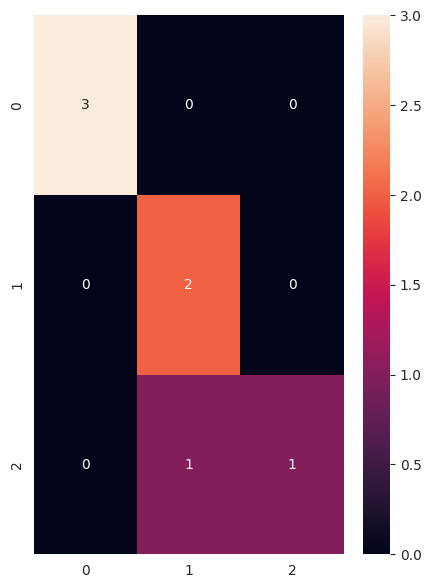

In [44]:
y_pred = pipeline.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 7))
sn.heatmap(conf_matrix, annot=True)

/home/arthur/.local/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


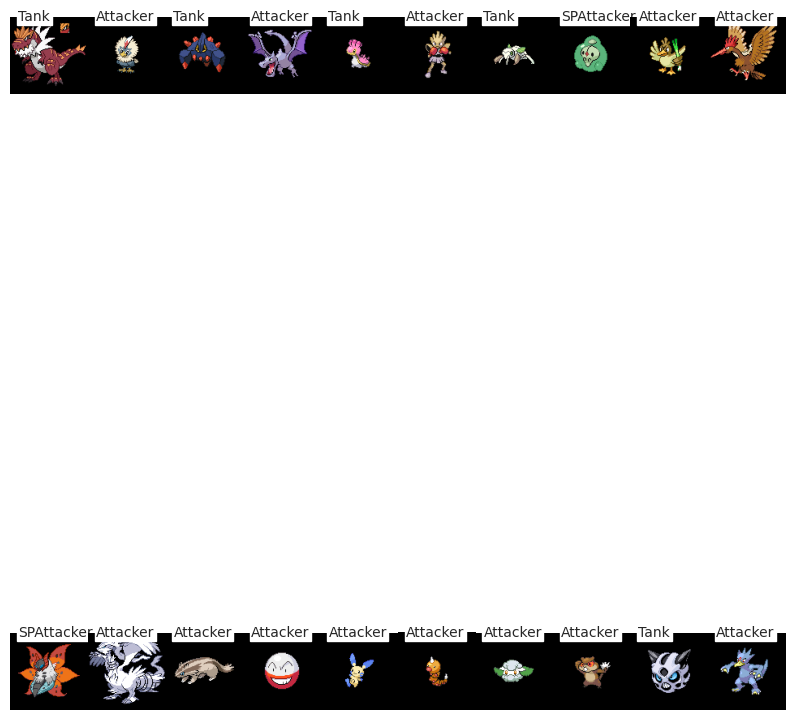

In [46]:
pokedex_df_sample = pokedex_df.sample(n=20)

pokedex_df_sample = pokedex_df_sample.assign(
    role=pipeline.predict(pokedex_df_sample[status_columns])
).reset_index()

f, axarr = plt.subplots(2, 10, figsize=(10, 10), gridspec_kw={'wspace': 0, 'hspace': 3})

for i in range(2):
    for j in range(10):
        image_url = pokedex_df_sample.loc[(i * 10) + j]["image_url"]
        image_file = imread(image_url)
        name = pokedex_df_sample.loc[(i * 10) + j]["name"]
        role = pokedex_df_sample.loc[(i * 10) + j]["role"]
        axarr[i][j].text(10, 5, role, bbox={'facecolor': 'white', 'pad': 1})

        axarr[i][j].imshow(image_file)
        axarr[i][j].axis('off')
        axarr[i][j].set_aspect('equal')

plt.show()